In [1]:
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
import pandas as pd

In [2]:
# create the iris dataframe from sklearn datasets
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df["target"] = iris.target

In [3]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


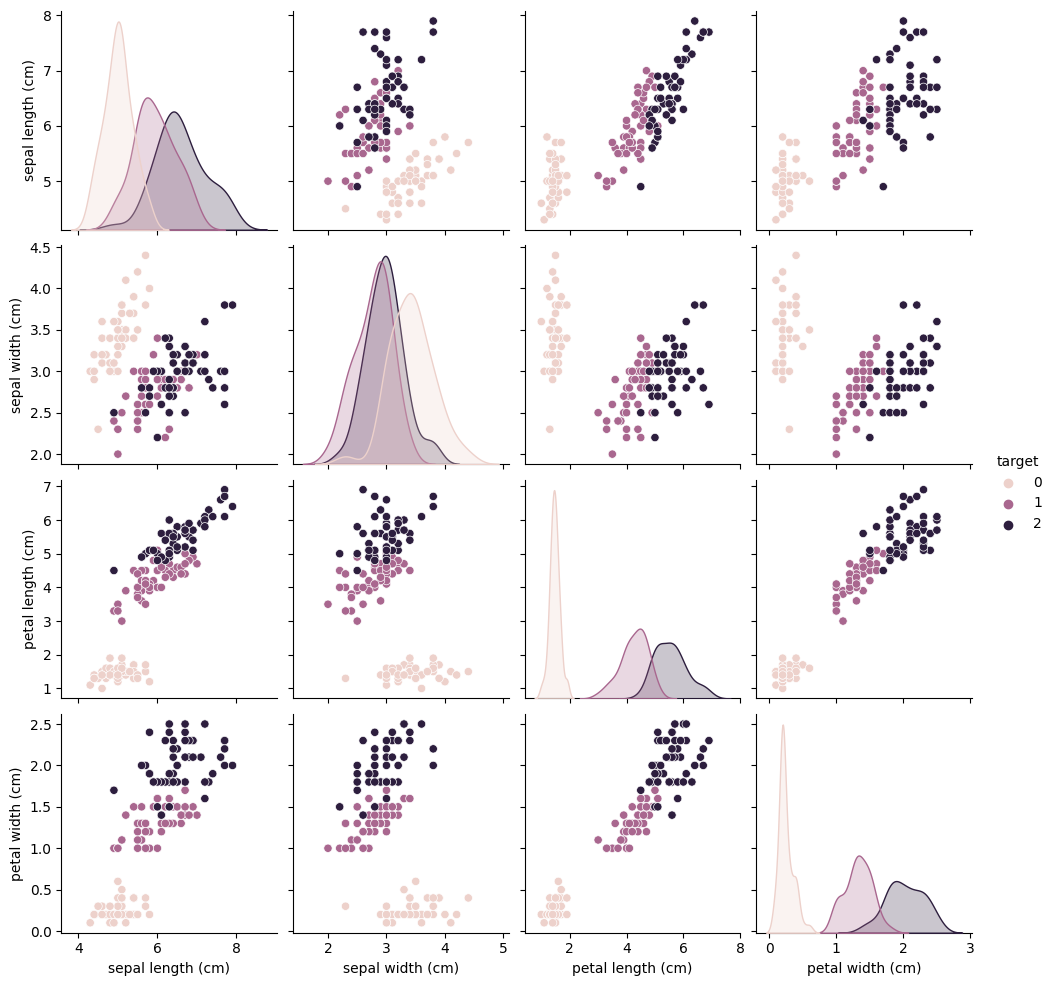

In [14]:

sns.pairplot(iris_df, hue="target")

plt.show()

In [16]:

# First two features for visualization purposes
X = iris.data[:, :2]
y = iris.target

# Split the dataset into training and testing sets Separe la base de train/test en 90/10
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=0
)

In [17]:
import numpy as np
from sklearn.svm import SVC


def train_and_plot(kernel_name):
        # Create a SVM classifier with a linear kernel
    svm = SVC(kernel=kernel_name, random_state=0)

    # Train the SVM classifier
    svm.fit(X_train, y_train)
    # Plot the decision boundary
    # Create a meshgrid of points to plot the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.02),
        np.arange(y_min, y_max, 0.02)
    )

    # Make predictions on the meshgrid points
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    fig, ax = plt.subplots(figsize=(8, 6))

    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    ax.scatter(
        X[:, 0], X[:, 1],
        c=y, cmap=plt.cm.Paired,
        edgecolors='black',
    )

    # Add class labels
    for i, label in enumerate(iris.target_names):
        ax.text(
            X[y == i, 0].mean(), X[y == i, 1].mean(),
            label,
            color='black',
            backgroundcolor='white',
            ha='center', va='center',
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round')
        )

    ax.set_xlabel('Sepal Length')
    ax.set_ylabel('Sepal Width')
    ax.set_title('SVM Classification')
    


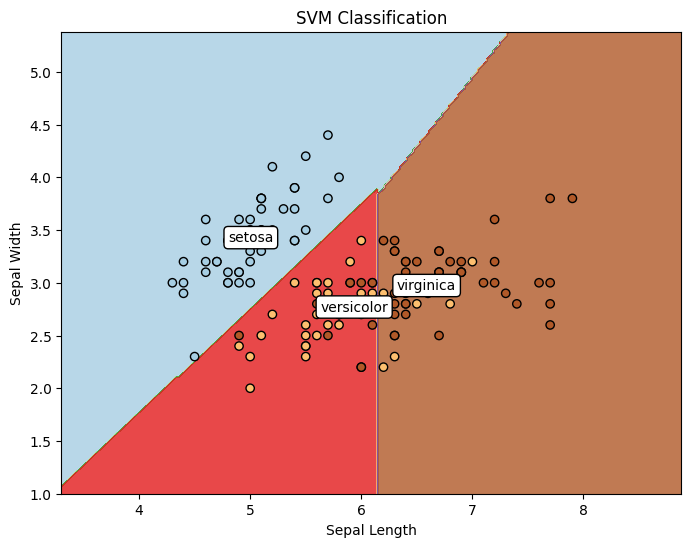

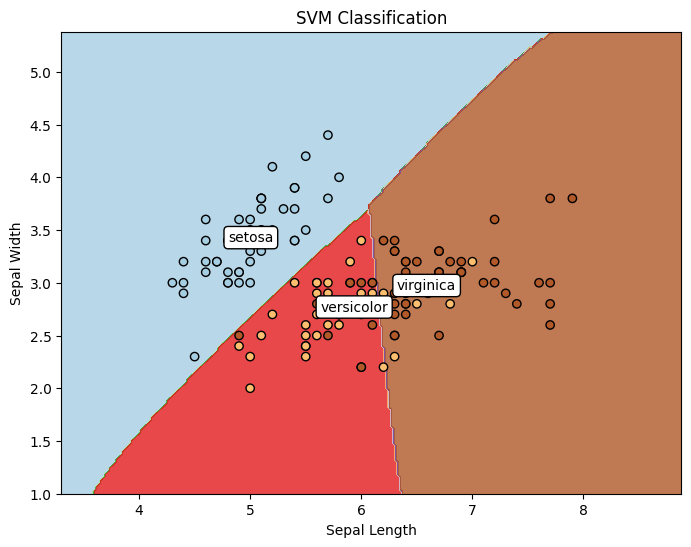

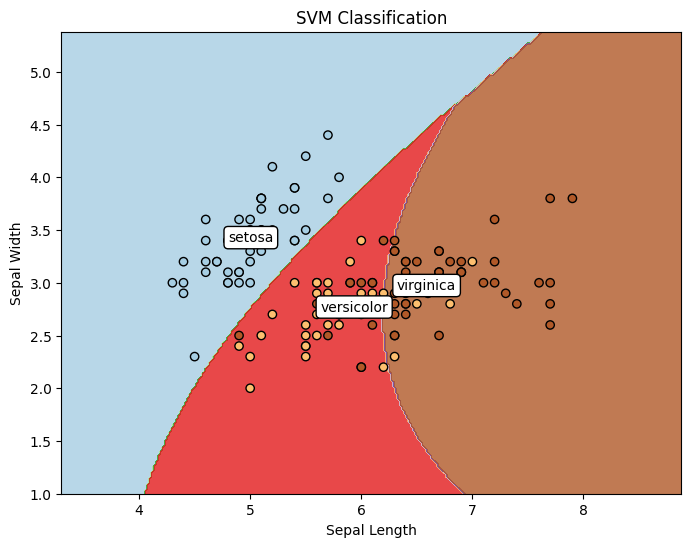

In [18]:
for i in ['linear', 'rbf', 'poly']:
    train_and_plot(i)
    plt.show()

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3